In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

c:\Users\pujas\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from numpy import median


df_filtered = df[df['job_title_short'] == 'Data Analyst'] # Filter the DataFrame for 'Data Analyst' job title

df_exploded = df_filtered.explode('job_skills') # Explode the 'job_skills' column to have one skill per row

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10) # Sort the skills by count in descending order and reset index

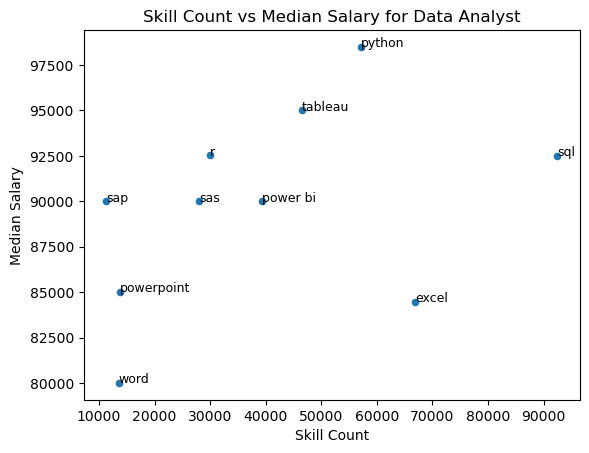

In [14]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary') # Create a scatter plot with skill count on x-axis and median salary on y-axis
plt.title('Skill Count vs Median Salary for Data Analyst') # Add a title to the plot
plt.xlabel('Skill Count') # Label for x-axis
plt.ylabel('Median Salary') # Label for y-axis
# plt.grid() # Add grid for better readability

for i, skill in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], skill, fontsize=9) # Annotate each point with the skill name

plt.show() # Display the plot